Loading line from dict:   0%|          | 0/31427 [00:00<?, ?it/s]

Done loading line from dict.           


Loading line from dict:   0%|          | 0/7477 [00:00<?, ?it/s]

Done loading line from dict.           


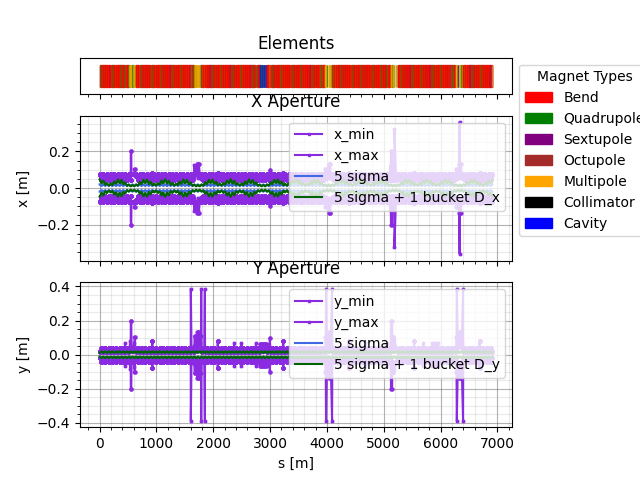

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

AttributeError: 'function' object has no attribute 'cid'

In [2]:
%matplotlib ipympl
import xtrack as xt
import ApertureCalculator as ac
import InteractivePlotter as ip

line = xt.Line.from_json('../injection_lines/injection_thin_approx_ap2.json')
line_thick = xt.Line.from_json('../injection_lines/injection_thick_approx_ap.json')

plotter = ip.InteractiveAperturePlotter(line, line_thick)
plotter.plot_5sigma_beam()
plotter.plot_5sigma_off_momentum()
#plotter.plot_dispersion()
plotter.show()

In [1]:
tw = line.twiss()

NameError: name 'line' is not defined

In [ ]:
import xtrack as xt
import ApertureCalculator as ac
import InteractivePlotter as ip
import numpy as np

line = xt.Line.from_json('../injection_lines/injection_thin_approx_ap2.json')
line_thick = xt.Line.from_json('../injection_lines/injection_thick_approx_ap.json')

ap_calc = ac.ApertureCalculator(line)
x_ext = ap_calc.compute_x_extent()
y_ext = ap_calc.compute_y_extent()

tw = line.twiss()
tab = line.get_table()
mask = [el.startswith('Limit') for el in tab.element_type]

exn=3.5e-6
sigma_x = np.sqrt(tw.betx*exn/tw.gamma0)
sigma_x_restr = np.array([sigma_x[i] for i in range(len(sigma_x)) if mask[i]])
sigma_y = np.sqrt(tw.betx*exn/tw.gamma0)
sigma_y_restr = np.array([sigma_y[i] for i in range(len(sigma_y)) if mask[i]])

ap_s_x = np.array([[x_ext[i, 0]/sigma_x_restr[i], x_ext[i, 1]/sigma_x_restr[i]] for i in range(len(sigma_x_restr))])
ap_s_y = np.array([[y_ext[i, 0]/sigma_y_restr[i], y_ext[i, 1]/sigma_y_restr[i]] for i in range(len(sigma_y_restr))])

plotter = ip.InteractiveAperturePlotter(line, line_thick, ap_x=ap_s_x, ap_y=ap_s_y)
plotter.show()

In [1]:
import xtrack as xt
import ApertureCalculator as ac
import InteractivePlotter as ip
import numpy as np

In [2]:
line = xt.Line.from_json('../injection_lines/injection_thin_approx_ap2.json')
line_thick = xt.Line.from_json('../injection_lines/injection_thick_approx_ap.json')

Loading line from dict:   0%|          | 0/31427 [00:00<?, ?it/s]

Done loading line from dict.           


Loading line from dict:   0%|          | 0/7477 [00:00<?, ?it/s]

Done loading line from dict.           


In [3]:
ap_calc = ac.ApertureCalculator(line)

In [111]:
x_ext = ap_calc.compute_x_extent()
y_ext = ap_calc.compute_y_extent()

In [ ]:
np.where(y_ext[:,1] == np.min(y_ext[:,1]))

np.float64(0.01615)

In [9]:
np.where(y_ext[:,1] == np.min(y_ext[:,1]))

(array([1282, 1283]),)

In [5]:
tw = line.twiss()

In [6]:
tab = line.get_table()
mask = [el.startswith('Limit') for el in tab.element_type]

In [13]:
sigma_y_restr[1282]

np.float64(0.0024395098723661783)

In [12]:
exn=3.5e-6
sigma_x = np.sqrt(tw.betx*exn/tw.gamma0)
sigma_x_restr = np.array([sigma_x[i] for i in range(len(sigma_x)) if mask[i]])
sigma_y = np.sqrt(tw.bety*exn/tw.gamma0)
sigma_y_restr = np.array([sigma_y[i] for i in range(len(sigma_y)) if mask[i]])

In [14]:
ap_s_x = np.array([[x_ext[i, 0]/sigma_x_restr[i], x_ext[i, 1]/sigma_x_restr[i]] for i in range(len(sigma_x_restr))])
ap_s_y = np.array([[y_ext[i, 0]/sigma_y_restr[i], y_ext[i, 1]/sigma_y_restr[i]] for i in range(len(sigma_y_restr))])

In [35]:
np.min(ap_s_x[:,1])

np.float64(14.201248241430623)

In [15]:
np.min(ap_s_y[:,1])

np.float64(6.168350156276337)

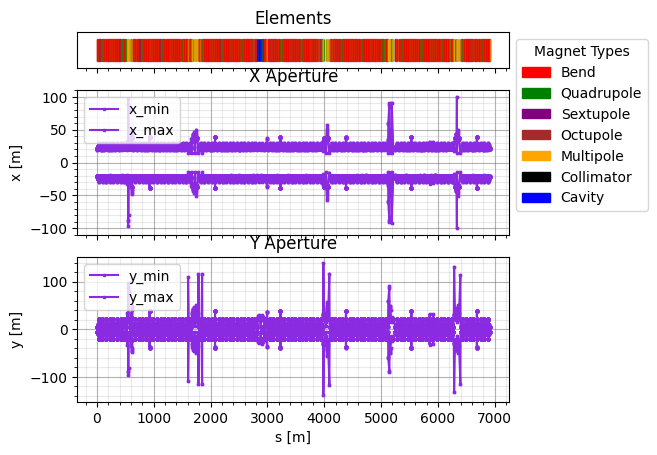

In [48]:
plotter = ip.InteractiveAperturePlotter(line, line_thick, ap_x=ap_s_x, ap_y=ap_s_y)

In [105]:
x_int = np.linspace(-12.7, 12.7, round(12.7*2/0.1)+1)
x_ext = np.linspace(-14.7, 14.7, round(14.7*2/0.1)+1)

y_int = np.linspace(-4.6683, 4.6683, round(4.6683*2/0.1)+1)
y_ext = np.linspace(-6.6683, 6.6683, round(6.6683*2/0.1)+1)

X, Y = np.meshgrid(x_ext, y_ext, indexing='xy')

x_flat = X.ravel()
y_flat = Y.ravel()

# Filter out points that fall inside the inner rectangle
mask = ~((x_flat >= x_int.min()) & (x_flat <= x_int.max()) &
         (y_flat >= y_int.min()) & (y_flat <= y_int.max()))

# Apply mask
x_hollow = x_flat[mask]
y_hollow = y_flat[mask]


In [126]:
1555*10

15550

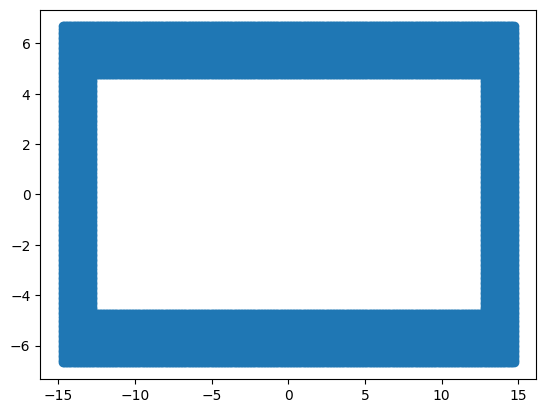

In [107]:
plt.close()
plt.scatter(x_hollow, y_hollow)
plt.show()

In [108]:
part = line.build_particles(x_norm=x_hollow, y_norm=y_hollow, px_norm=np.zeros_like(x_hollow), py_norm=np.zeros_like(x_hollow), nemitt_x=3.5e-6, nemitt_y=3.5e-6)

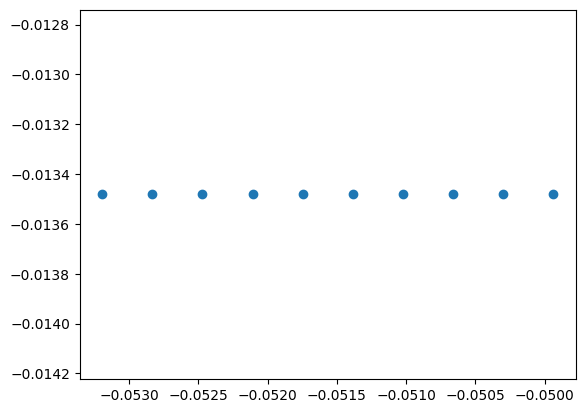

In [135]:
plt.close()
plt.scatter(part.x, part.y)
plt.show()

In [124]:
len(part.x)

15560

In [125]:
15560*3

46680

In [134]:
step =0
x_norm = x_hollow[step*10:step*10+10]
y_norm = y_hollow[step*10:step*10+10]
px_norm = np.zeros_like(x_norm)
py_norm = np.zeros_like(y_norm)
part = line.build_particles(x_norm=x_norm, px_norm=px_norm, y_norm=y_norm, py_norm=py_norm, nemitt_x=3.5e-6, nemitt_y=3.5e-6)

In [128]:
x_norm

array([-14.7, -14.6, -14.5, -14.4, -14.3, -14.2, -14.1, -14. , -13.9,
       -13.8])

In [139]:
import json
from pathlib import Path
path_out = Path('/eos/user/l/lpauwels/ht_condor_sps_tracking_results/')

In [143]:
import pickle

In [144]:
with open(Path(path_out, f'particles_test.json'), 'wb') as f:
    pickle.dump(part.to_dict(), f)

In [146]:
with open(Path(path_out, f'particles_test.json'), 'rb') as f:
    d = pickle.load(f)

In [142]:
dic

{'particle_id': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'mass0': np.float64(938272088.1604904),
 'parent_particle_id': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'pdg_id': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'zeta': array([-8.43361021e-05, -8.37623871e-05, -8.31886721e-05, -8.26149571e-05,
        -8.20412421e-05, -8.14675272e-05, -8.08938122e-05, -8.03200972e-05,
        -7.97463822e-05, -7.91726672e-05]),
 'state': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'charge_ratio': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'x': array([-0.05319454, -0.05283267, -0.0524708 , -0.05210893, -0.05174707,
        -0.0513852 , -0.05102333, -0.05066146, -0.0502996 , -0.04993773]),
 'at_turn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '_rng_s4': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32),
 'weight': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 '_rng_s2': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32),
 'y': array([-0.01348185, -0.01348185, -0.01348185, -0.01348185, -0.01348185,
 

In [147]:
d

{'particle_id': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'mass0': np.float64(938272088.1604904),
 'parent_particle_id': array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 'pdg_id': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 'zeta': array([-8.43361021e-05, -8.37623871e-05, -8.31886721e-05, -8.26149571e-05,
        -8.20412421e-05, -8.14675272e-05, -8.08938122e-05, -8.03200972e-05,
        -7.97463822e-05, -7.91726672e-05]),
 'state': array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1]),
 'charge_ratio': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 'x': array([-0.05319454, -0.05283267, -0.0524708 , -0.05210893, -0.05174707,
        -0.0513852 , -0.05102333, -0.05066146, -0.0502996 , -0.04993773]),
 'at_turn': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0]),
 '_rng_s4': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32),
 'weight': array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.]),
 '_rng_s2': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=uint32),
 'y': array([-0.01348185, -0.01348185, -0.01348185, -0.01348185, -0.01348185,
 